# EXPERIMENT 2

### SHIVAM SINGHAL 2K18/CO/340

**AIM:** To perform Data Preprocessing like outlier detection, handling missing value, analyzing redundancy and normalization on different datasets. 

In [110]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
#dataset url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

Importing the dataset

In [112]:
headers = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']
df = pd.read_csv(url, header=None, names=headers)

In [113]:
df #total 150 rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [114]:
#Brief description of all the inputs
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [115]:
array = df.values
X = array[:, 0:4]
Y = array[: , 4] #output 

### Checking for missing values

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [117]:
df.isnull().describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150,150,150,150,150
unique,1,1,1,1,1
top,False,False,False,False,False
freq,150,150,150,150,150


### Visualize the data

In [118]:
# define a function for plotting the scatter plot
def plot(df,x,y):
    colors_plot = {
        'Iris-setosa'     : 'red',
        'Iris-versicolor' : 'blue',
        'Iris-virginica'  : 'green'
    }

    for species in colors_plot.keys():
      plt.scatter(
          df[df['Species'] == species][x],
          df[df['Species'] == species][y],
          c = colors_plot[species],
          label = species
      )

    plt.xlabel(x)
    plt.ylabel(y)
    plt.title('Graph to visualise outliers and clusters')
    plt.legend()

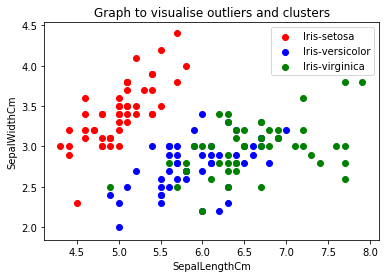

In [119]:
plot(df , 'SepalLengthCm' , 'SepalWidthCm')

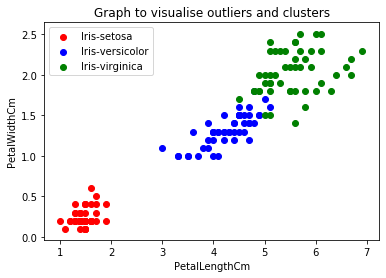

In [120]:
plot(df, 'PetalLengthCm' , 'PetalWidthCm')

### DATA NORMALIZATION

In [121]:
from sklearn import preprocessing
normalised_X = preprocessing.normalize(df.values[:,0:4])

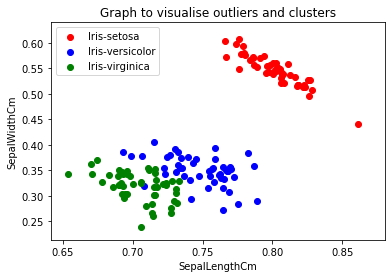

In [122]:
normalised_df = pd.DataFrame(normalised_X , columns = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
normalised_df['Species'] = df['Species']
plot(normalised_df , 'SepalLengthCm' , 'SepalWidthCm')

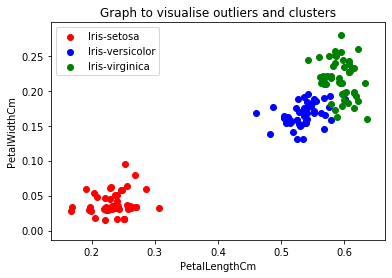

In [123]:
plot(normalised_df, 'PetalLengthCm' , 'PetalWidthCm')

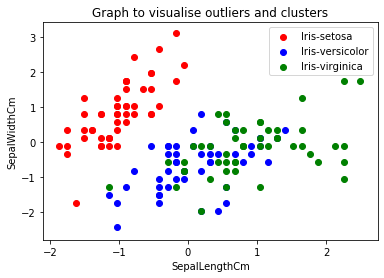

In [124]:
standardise_X = preprocessing.scale(df.values[:,0:4])
standardise_df = pd.DataFrame(standardise_X , columns = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
standardise_df['Species'] = df['Species']
plot(standardise_df , 'SepalLengthCm' , 'SepalWidthCm')

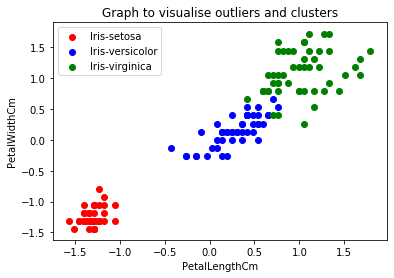

In [125]:
plot(standardise_df, 'PetalLengthCm' , 'PetalWidthCm')

In [126]:
print(df.describe())
print(normalised_df.describe())
print(standardise_df.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        0.751621      0.404780       0.454958      0.140965
std         0.044619      0.105087       0.159747      0.078136
min         0.653877      0.238392       0.167836      0.014727
25%         0.715261      0.326738       0.250925      0.048734
50%         0.754883      0.354371      

### Implementing Anomaly Detection
#### Gaussian Mixture

In [127]:
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm
from matplotlib.ticker import MaxNLocator

In [128]:
def outliers_list(prob, e):
  outliers = np.where(prob <= e, 1, 0)
  return outliers

In [129]:
X_train = df[['PetalLengthCm', 'PetalWidthCm']].values

model = GaussianMixture(n_components=3, covariance_type='full')
model.fit(X_train)

outliers = outliers_list(ml_model.score_samples(X_train), -2.83)

df["is_outlier"] = outliers


### Visualising the outliers

Text(0, 0.5, 'Petal Width')

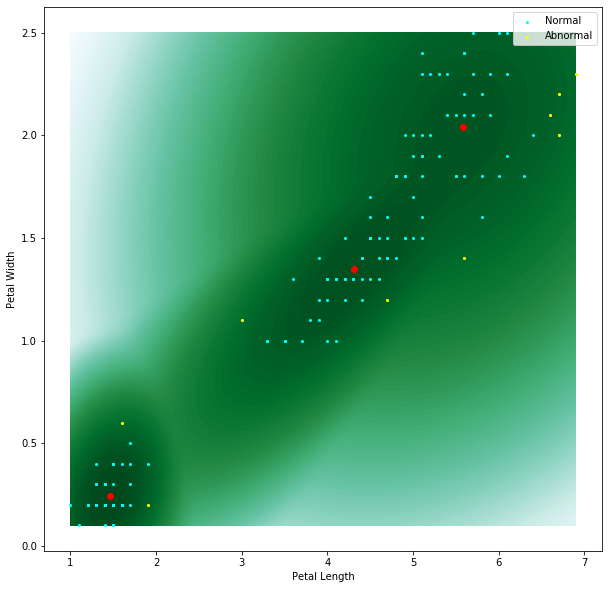

In [130]:
x = np.linspace(df['PetalLengthCm'].min(), df['PetalLengthCm'].max())
y = np.linspace(df['PetalWidthCm'].min(), df['PetalWidthCm'].max())
X, Y = np.meshgrid(x, y)

XX = np.array([X.ravel(), Y.ravel()]).T
Z = model.score_samples(XX)
Z = Z.reshape(X.shape)

levels = MaxNLocator(nbins=100).tick_values(Z.min(), Z.max()) 
cmap = plt.get_cmap('BuGn')

plt.figure(figsize=(10,10))
plt.contourf(X, Y, Z.reshape(X.shape), cmap=cmap, levels=levels) 
plt.scatter(model.means_[:,0], model.means_[:,1], color="red")
g1 = plt.scatter(df[df['is_outlier']==0]['PetalLengthCm'].values,
df[df['is_outlier']==0]['PetalWidthCm'].values, label="Normal",s=4.0,c="cyan")
g2 = plt.scatter(df[df['is_outlier']==1]['PetalLengthCm'].values,
df[df['is_outlier']==1]['PetalWidthCm'].values, label="Abnormal",s=4.5,c="yellow")
plt.legend(handles=[g1,g2]) 
    
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [131]:
df['is_outlier'].value_counts()

0    141
1      9
Name: is_outlier, dtype: int64

**This means that out of the 150 data points, we have 9 Outliers in total**

In [132]:
df_without_outliers = df[df['is_outlier'] == 0]
df_without_outliers.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,is_outlier
count,141.000000,141.000000,141.000000,141.000000,141.0
mean,5.806383,3.057447,3.688652,1.182270,0.0
std,0.784057,0.433299,1.721631,0.763758,0.0
min,4.300000,2.000000,1.000000,0.100000,0.0
25%,5.100000,2.800000,1.500000,0.300000,0.0
50%,5.800000,3.000000,4.300000,1.300000,0.0
75%,6.400000,3.300000,5.100000,1.800000,0.0
max,7.900000,4.400000,6.400000,2.500000,0.0


The outliers have been removed effectively?

In [155]:
df = df.drop(labels = 'is_outlier' , axis = 1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Implementing OneClassSVM Anomaly Detection Technique

In [184]:
df.head()
from sklearn import svm
clf=svm.OneClassSVM(nu=.2,kernel='rbf',gamma=.001)
clf.fit(df.values[:,2:4])
y_pred=clf.predict(df.values[:,2:4])
df['isOutlier'] = y_pred

Text(0, 0.5, 'Petal Width')

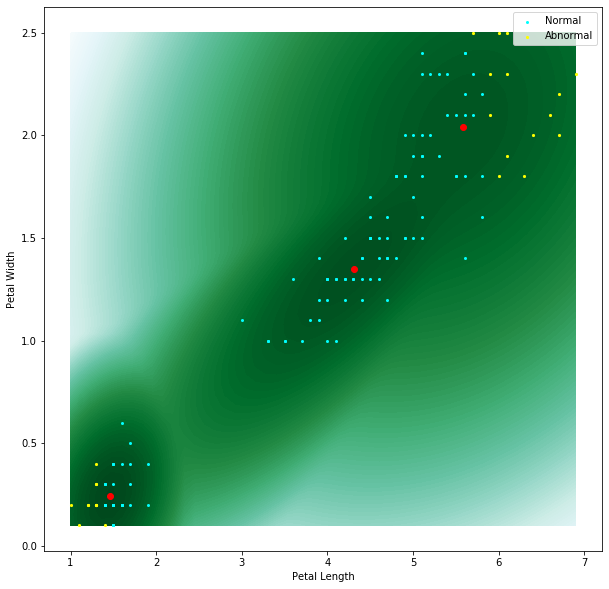

In [185]:
x = np.linspace(df['PetalLengthCm'].min(), df['PetalLengthCm'].max())
y = np.linspace(df['PetalWidthCm'].min(), df['PetalWidthCm'].max())
X, Y = np.meshgrid(x, y)

XX = np.array([X.ravel(), Y.ravel()]).T
Z = model.score_samples(XX)
Z = Z.reshape(X.shape)

levels = MaxNLocator(nbins=100).tick_values(Z.min(), Z.max()) 
cmap = plt.get_cmap('BuGn')

plt.figure(figsize=(10,10))
plt.contourf(X, Y, Z.reshape(X.shape), cmap=cmap, levels=levels) 
plt.scatter(model.means_[:,0], model.means_[:,1], color="red")
g1 = plt.scatter(df[df['isOutlier']==1]['PetalLengthCm'].values,
df[df['isOutlier']==1]['PetalWidthCm'].values, label="Normal",s=4.0,c="cyan")
g2 = plt.scatter(df[df['isOutlier']==-1]['PetalLengthCm'].values,
df[df['isOutlier']==-1]['PetalWidthCm'].values, label="Abnormal",s=4.5,c="yellow")
plt.legend(handles=[g1,g2]) 
    
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [187]:
df['isOutlier'].value_counts()

 1    124
-1     26
Name: isOutlier, dtype: int64

In [189]:
df_without_outliers_svm = df[df['isOutlier'] == 1]
df_without_outliers_svm.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,isOutlier
count,124.000000,124.000000,124.000000,124.000000,124.0
mean,5.772581,3.019355,3.720968,1.184677,1.0
std,0.667155,0.432177,1.561544,0.705731,0.0
min,4.400000,2.000000,1.400000,0.100000,1.0
25%,5.100000,2.775000,1.600000,0.400000,1.0
50%,5.750000,3.000000,4.300000,1.300000,1.0
75%,6.300000,3.300000,5.000000,1.800000,1.0
max,7.200000,4.400000,5.800000,2.400000,1.0


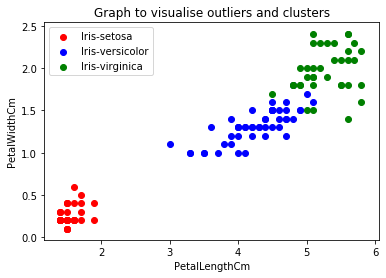

In [191]:
plot(df_without_outliers_svm , 'PetalLengthCm' , 'PetalWidthCm') 

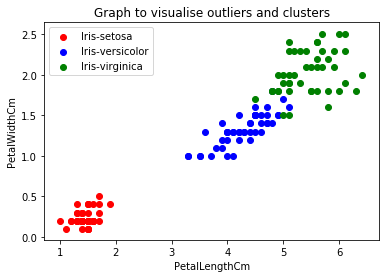

In [192]:
plot(df_without_outliers , 'PetalLengthCm' , 'PetalWidthCm') 

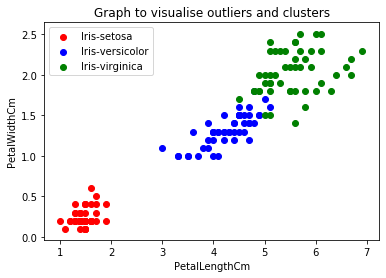

In [193]:
plot(df, 'PetalLengthCm' , 'PetalWidthCm') 